# Load the Basic Libraries


In [34]:
import sys
#scientific calculations
import scipy
#Linear Algebra and Maltix Maltiplication and Array manipulations
#Numpy is short for numeric python
import numpy
# Data Manipulation
import pandas as pd
# the package to read a csv file into a dataframe
from pandas import read_csv
#Machine Learning Algorithms
import sklearn

# Loading the Dataset from a CSV file

In [35]:
# We are going to import the dataset from a git site using pandas read_csv
iris = read_csv("https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv")


# Exploring the Dataset

In [36]:
#explore the basic statistics of the dataset
iris.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [37]:
#print the top 5 rows of the dataframe
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [39]:
#find the shape of the dataset#
iris.shape

(150, 5)

In [44]:
#from the dataset we can see that there are 4 features and one target variable also known as the class
#lets see how many classes are there

#iris['variety'].value_counts()
print(iris.groupby('variety').size())

variety
Setosa        50
Versicolor    50
Virginica     50
dtype: int64


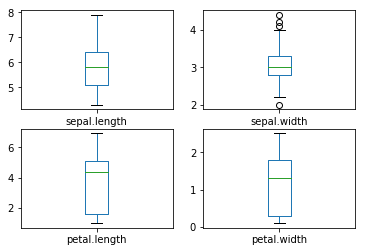

In [48]:
#this is the beauty of this dataset, very well balanced, as you do not have to apply any complex methodolgy 
#to avoid any bias, perfect for a starter

#now lets see the data spread using a box plot graph
#import plotting librarries
from pandas.plotting import scatter_matrix
from matplotlib import pyplot

#ensures that plots are  the output of plotting commands is displayed inline within frontends like the Jupyter notebook, 
#directly below the code cell that produced it. 
#The resulting plots will then also be stored in the notebook document

from sklearn import preprocessing
%matplotlib inline


iris.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
pyplot.show()




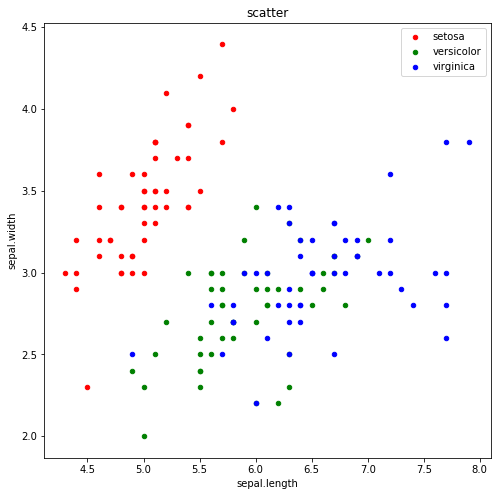

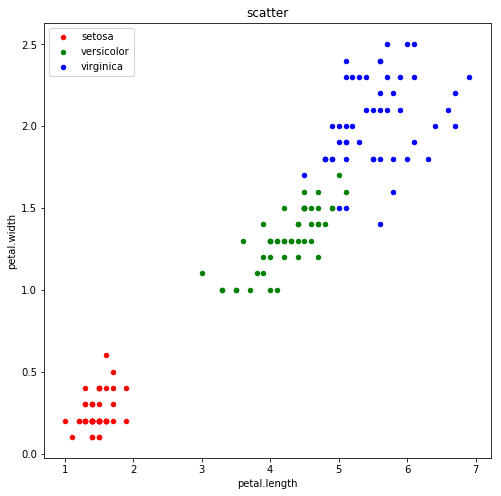

In [58]:
#Lets do a scatter plot just to observe the data
#discuss the shape

pyplot.rcParams["figure.figsize"]=8,8
ax = iris[iris.variety=='Setosa'].plot.scatter(x='sepal.length', y='sepal.width', 
                                                    color='red', label='setosa')
iris[iris.variety=='Versicolor'].plot.scatter(x='sepal.length', y='sepal.width', 
                                                color='green', label='versicolor', ax=ax)
iris[iris.variety=='Virginica'].plot.scatter(x='sepal.length', y='sepal.width', 
                                                color='blue', label='virginica', ax=ax)
ax.set_title("scatter")

ax2 = iris[iris.variety=='Setosa'].plot.scatter(x='petal.length', y='petal.width', 
                                                    color='red', label='setosa')
iris[iris.variety=='Versicolor'].plot.scatter(x='petal.length', y='petal.width', 
                                                color='green', label='versicolor', ax=ax2)
iris[iris.variety=='Virginica'].plot.scatter(x='petal.length', y='petal.width', 
                                                color='blue', label='virginica', ax=ax2)
ax2.set_title("scatter")





C:\Users\ishaf\Anaconda3.1\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


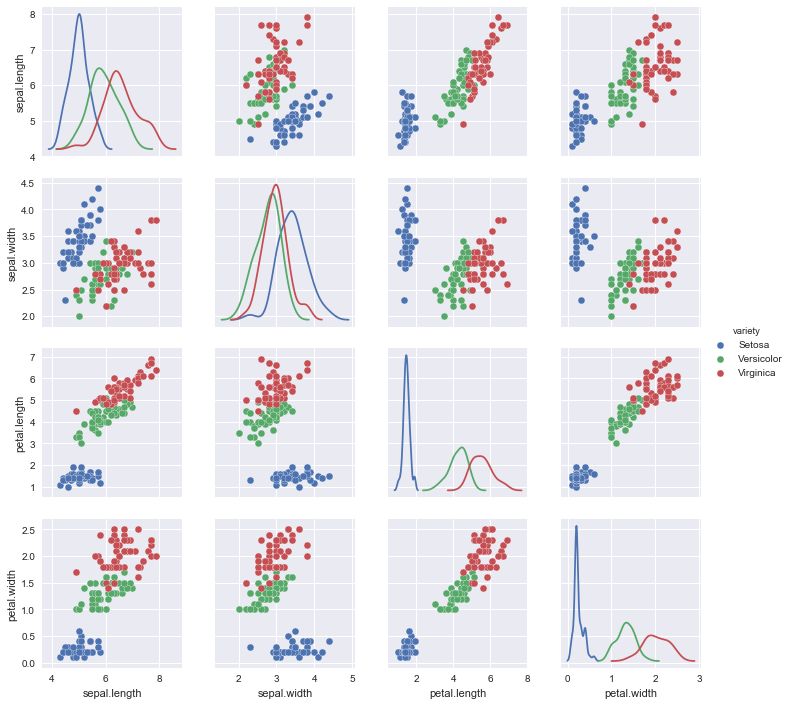

In [63]:
# One of the main data exploration exercise is to see the correlation between the feateurs
# Seaborne is a popular package used for plotting in addition to the pyplot

import seaborn as sns
sns.set()
sns.pairplot(iris[['sepal.length', 'sepal.width', 'petal.length', 'petal.width','variety']],
             hue="variety", diag_kind="kde")

In the above correlation pair plots we can see a very strong correlation between petal length and petal width.
Which means we can make a choice to drop one of these features to make the algorithm run faster
Based on the complexity of the model we are working with and level of accuracy needed, 
it might not be a good idea to drop any of the features, however in a given situation where storage and speed may pose a problem
than dropping a highly correlated feature is something you can consider.


# Splitting the dataset for Training and Testing (Validation)

In [87]:
#import the model selection data split librarry
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(iris.loc[:,iris.columns !='variety'],iris['variety'], stratify=iris['variety'], X_train, X_validation, Y_train, Y_validation = train_test_split(X, y,  random_state=66)  

SyntaxError: unexpected EOF while parsing (<ipython-input-87-18697d9591d3>, line 4)

In [78]:
print(iris.shape)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(150, 5)
(112, 4)
(112,)
(38, 4)
(38,)


# Import the Librarries for Models Algorithms and Model Accuracy checking

In [79]:
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

#Many of the algorithms available for classification

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [88]:
model = KNeighborsClassifier()
kfold = StratifiedKFold(n_splits=10, random_state=100, shuffle=True)
cv_results = cross_val_score(model, x_train, y_train,cv=kfold,  scoring='accuracy')
print("%f  (%f)" % (cv_results.mean(),cv_results.std()))

0.975000  (0.038188)


In [81]:
model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [82]:
cv_results.mean()

0.975

In [83]:
cv_results.std()

0.03818813079129868

In [91]:
model.fit(x_train,y_train)
predictions = model.predict(x_test)

print("Accuracy Score  ",accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))


Accuracy Score   0.9473684210526315
[[13  0  0]
 [ 0 10  2]
 [ 0  0 13]]
             precision    recall  f1-score   support

     Setosa       1.00      1.00      1.00        13
 Versicolor       1.00      0.83      0.91        12
  Virginica       0.87      1.00      0.93        13

avg / total       0.95      0.95      0.95        38

